## New York City Airbnb Prices
#### In this example, I will look what features that may affect the price range of Airbnb and use these features to train a estimator for prices.

Import Data

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [167]:
# Import data
ori_df = pd.read_csv('AB_NYC_2019.csv')
df = ori_df.copy()
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [138]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [139]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

To save time, I will only look at units in Manhattan.

In [168]:
df = df[df['neighbourhood_group'] == 'Manhattan']
df['neighbourhood_group'].unique()

array(['Manhattan'], dtype=object)

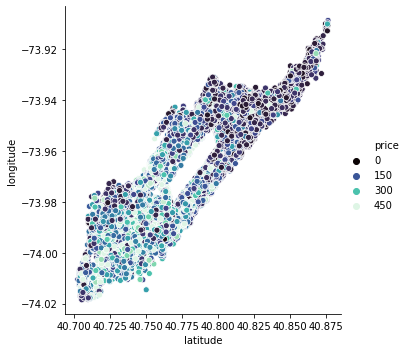

In [141]:
norm = plt.Normalize(vmin=0,vmax=400)
sns.relplot(x = 'latitude', y = 'longitude', data = df, hue = 'price', hue_norm = norm, palette = 'mako')

In [142]:
df['neighbourhood'].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

In [169]:
# Look at the median price of each neighbourhood
df2 = df.groupby(['neighbourhood'])['price'].agg({'Median_price_neighbour': np.median})
df2 = df2.reset_index()

C:\Users\lw1365\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


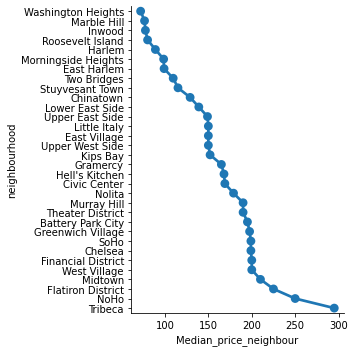

In [170]:
# sort with median price per neighbourhood
df2 = df2.sort_values(by = ['Median_price_neighbour'])
g = sns.catplot(x = 'Median_price_neighbour', y = 'neighbourhood', data = df2, kind = 'point')

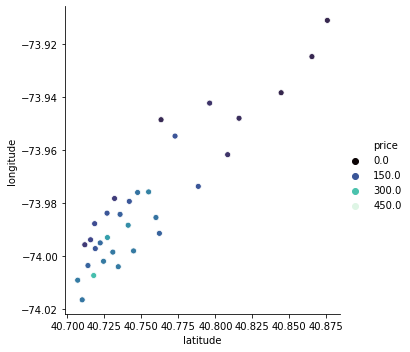

In [204]:
df21 = df.groupby(['neighbourhood']).agg({'price': np.median, 'latitude': np.mean, 'longitude': np.mean})
df21 = df21.reset_index()
sns.relplot(x = 'latitude', y = 'longitude', data = df21, hue = 'price', hue_norm = norm, palette = 'mako')

In [221]:
df22 = df.groupby(['room_type']).agg({'price': np.median})
df22 = df22.reset_index()
df22

# g = sns.catplot(x = 'price', y = 'room_type', data = df, kind = 'point') # chose "point" plot, outliers

,room_type,price
0,Entire home/apt,191
1,Private room,90
2,Shared room,69


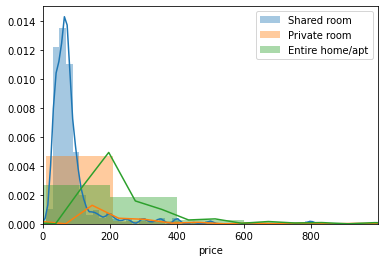

In [238]:
sns.distplot(df['price'][df['room_type'] == 'Shared room'])
sns.distplot(df['price'][df['room_type'] == 'Private room'])
sns.distplot(df['price'][df['room_type'] == 'Entire home/apt'])
plt.xlim(np.min(df['price']),np.percentile(df['price'], 99))
plt.legend(['Shared room', 'Private room', 'Entire home/apt'])

From my revious analysis on this dataset, I found that other features did not show clear correlation with price.

In [171]:
# Convert the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
df1a = pd.DataFrame([df['neighbourhood'], df['room_type']]).T 
df1a['neighbourhood'] = le.fit_transform(df1a['neighbourhood']) #convert neighhourhoods to distinct numbers
df1a['room_type'] = le.fit_transform(df1a['room_type']) #convert room types to distinct numbers
ohe = OneHotEncoder(categories='auto')
df1a = ohe.fit_transform(df1a).toarray() # use one hot encoder to convert distinct numbers to columns of 0s and 1s

In [182]:
co_name = sorted(df['neighbourhood'].unique()) + sorted(df['room_type'].unique())
df1b = pd.DataFrame(df1a, columns = co_name)
df1b.head(2)

,Battery Park City,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Financial District,Flatiron District,Gramercy,Greenwich Village,...,Theater District,Tribeca,Two Bridges,Upper East Side,Upper West Side,Washington Heights,West Village,Entire home/apt,Private room,Shared room
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


I will use neighbourhood and room type information to train the predictor.

In [184]:
X = df1b.copy()

,Battery Park City,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Financial District,Flatiron District,Gramercy,Greenwich Village,...,Theater District,Tribeca,Two Bridges,Upper East Side,Upper West Side,Washington Heights,West Village,Entire home/apt,Private room,Shared room
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
df['price'].describe()

count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64

The mean of all airbnb prices in Manhattan is 196.88 dollars/night, I decided to convert prices to two catergories with 196.88 as the  boundary.

In [73]:
y = [1 if df['price'].iloc[i] >= 196.88 else 0 for i in range(len(df))] 

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [219]:
# Method 1: Logistic Regression
from sklearn.linear_model import LogisticRegression 
# GridSearch for better parameters
from sklearn.model_selection import GridSearchCV
grid_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr2 = LogisticRegression()
gg = GridSearchCV(lr2, param_grid = grid_values, scoring = 'accuracy', cv=5) 
gg.fit(X_train, y_train)
clf = gg.best_estimator_
# clf = LogisticRegression(C = 0.1, solver = 'lbfgs').fit(X_train, y_train)
s1 = clf.score(X_train, y_train)
s1a = clf.score(X_test, y_test)
print(s1)
print(s1a)

0.7439212065250846
0.7350443131462334


C:\Users\lw1365\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [217]:
# Method 2: Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)
s2 = clf.score(X_train, y_train)
s2a = clf.score(X_test, y_test)
print(s2)
print(s2a)

0.6664819944598338
0.6724519940915805


In [239]:
# Method 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
feature_names = X.columns
class_names = ['price']
grid_values = {'max_depth': [3, 5, 10, 20, 50, 100]}
clf = DecisionTreeClassifier()
gg = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy', cv=5) 
gg.fit(X_train, y_train)
clf = gg.best_estimator_
# clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
s3 = clf.score(X_train, y_train)
s3a = clf.score(X_test, y_test)
# print(gg.best_score_)
# print(gg.best_params_)
print(s3)
print(s3a)

0.7449061249615266
0.7392909896602659


In [220]:
# !pip install tabulate
from tabulate import tabulate
print(tabulate([['Logistic Regression', s1, s1a], ['Gaussian Naive Bayes', s2, s2a], ['Decision Tree', s3, s3a]], 
               headers=['Method', 'Accuracy Scores - Training', 'Accuracy Scores - Test']))


Method                  Accuracy Scores - Training    Accuracy Scores - Test
--------------------  ----------------------------  ------------------------
Logistic Regression                       0.743921                  0.735044
Gaussian Naive Bayes                      0.666482                  0.672452
Decision Tree                             0.744906                  0.739291


Future analysis can include more features. 



Next, I inclued a few more features to see if they can boost up the estimator.

The addition of these features decreased the accuracy of the estimator. Future analysis needs to include new features.